# Face Anonymizer
 Bu projede önce görüntüdeki yüzleri algılayacak ardından gauss filtresiyle algıladığımız yüzleri bulanklaştırarak görüntüyü anonim hale getireceğiz.

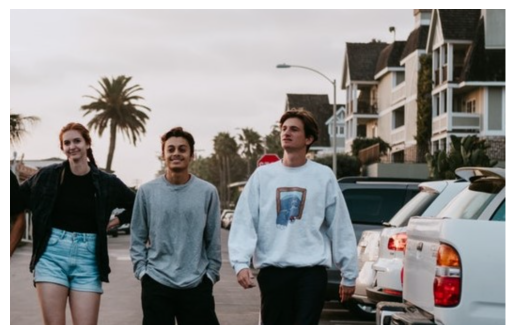

In [6]:
# Cascade ve gaussian blur için gerekli kütüphaneler
from skimage.feature import Cascade 
from skimage.filters import gaussian
import matplotlib.pyplot as plt

# Resmi okuyoruz
image = plt.imread('faces/anon.png')
plt.imshow(image), plt.axis('off')

Bulunan yüz sayısı:  3


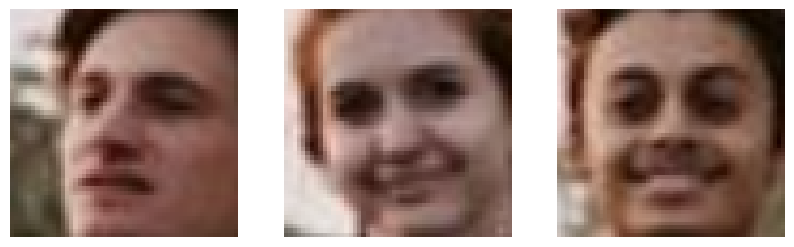

In [7]:
from skimage import data

# load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# initialize the detector cascade.
detector = Cascade(trained_file)

# Yüzleri tespit ediyoruz
detected = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2, step_ratio=1,
                                       min_size=(50, 50), max_size=(100, 100))

def getFace(d):
    
    '''Kordinatları içeren detected listesini kullanarak yüzlere rectangle çiziyoruz'''
    
    # r dikdörtgenin sol üst köşesinin x koordinatı, c başlangıç y koordinatı 
    x, y = d['r'], d['c']
    
    # dikdörtgeni tamamlamak için başlangıç noktalarına genişlik ve yükseklik ekliyoruz 
    width, height = d['r'] + d['width'], d['c'] + d['height']
    
    # dikdörtgeni çiziyoruz
    face = image[x:width, y:height]
    return face

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
f=0
# Bulunan her yüz için 
for d in detected:
    # Obtain the face cropped from detected coordinates
    face = getFace(d)   
    # subplota yüzleri ekle
    ax[f].imshow(face), ax[f].axis('off')
    f = f+1
print('Bulunan yüz sayısı: ', f)

In [8]:
def mergeBlurryFace(original, gaussian_image):
        
        '''Gaussian blur ile bulanıklaştırılmış yüzü orijinal resimle birleştiriyoruz'''
        
        # Bulanıklaştırılmış yüzün koordinatları
        x, y = d['r'], d['c']
        width, height = d['r'] + d['width'], d['c'] + d['height']
        
        original[x:width, y:height] = gaussian_image
        return original

(<matplotlib.image.AxesImage at 0x7f19f42e52a0>,
 (-0.5, 934.5, 594.5, -0.5),
 Text(0.5, 1.0, 'Faces blurred'))

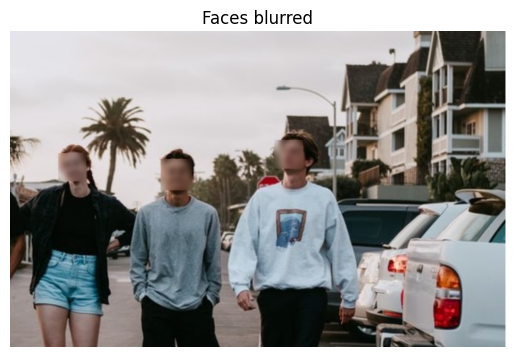

In [9]:
# Bulunan yüzlerin bulanıklaştırılmış hallerini birleştiriyoruz
for d in detected:
    face = getFace(d)
    
    gaussian_face = gaussian(face, multichannel=True, sigma=6)

    resulting_image = mergeBlurryFace(image, gaussian_face)

# Bulanıklaştırılmış resmi gösteriyoruz
plt.imshow(image), plt.axis('off'), plt.title('Faces blurred')